### Project - Ensemble Techniques - Term Deposit Subscription Prediction


In [386]:
#Student Name : Makarand More

In [473]:
#Task#1 Univariate analysis

import warnings
warnings.filterwarnings("ignore")
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [474]:
#Load given Data
df_TermDeposit=pd.read_csv("bank-full.csv")


In [475]:
df_TermDeposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [476]:
df_TermDeposit.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [477]:
print(df_TermDeposit.info())
print()
print(df_TermDeposit.shape)
print()
print(df_TermDeposit.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

(45211, 17)

age          0
job          0
marital      0
education    0
default      0
balan

In [478]:
df_TermDeposit.isnull().sum().sum() #missing value count in dataframe for both row and column

0

In [479]:
#Note: Total Data count 45211 and fortunate there are no Missing values.

In [480]:
df_TermDeposit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [481]:
n = df_TermDeposit.nunique(axis=0) 
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [482]:
#Notes: Mean Age is 41 (approx) and Max is 95, also minmum age is 18
#Total number of columns are 16 and out of those only 7 are numberic so wont be able gain much info from above.
#Negative balance would simply mean an overdraft.

In [483]:
for feature in df_TermDeposit.columns: # Loop through all columns in the dataframe
    if df_TermDeposit[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_TermDeposit[feature] = pd.Categorical(df_TermDeposit[feature]) 
df_TermDeposit.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [484]:
df_TermDeposit.info() #verify the conversion from object to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


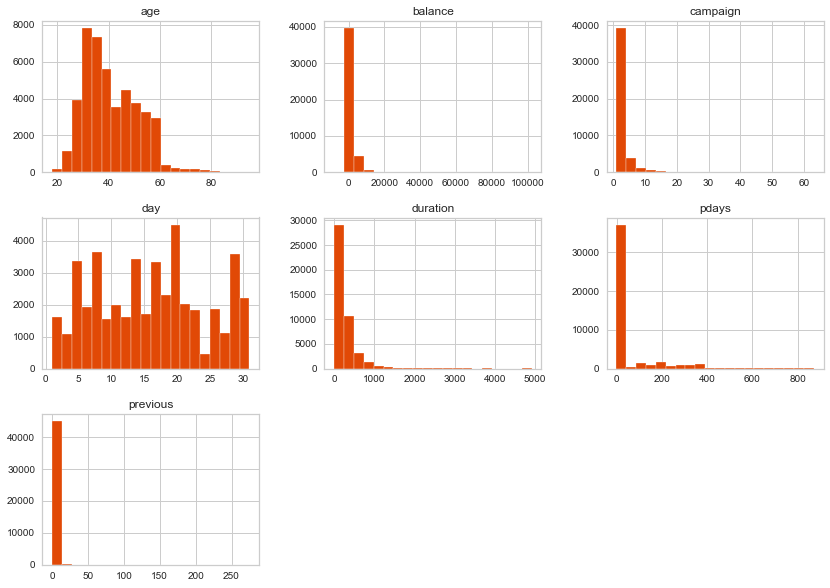

In [485]:
columns = list(df_TermDeposit)[:] 
df_TermDeposit[columns].hist(stacked=False, bins=20, figsize=(14,10), color='#E14906'); 

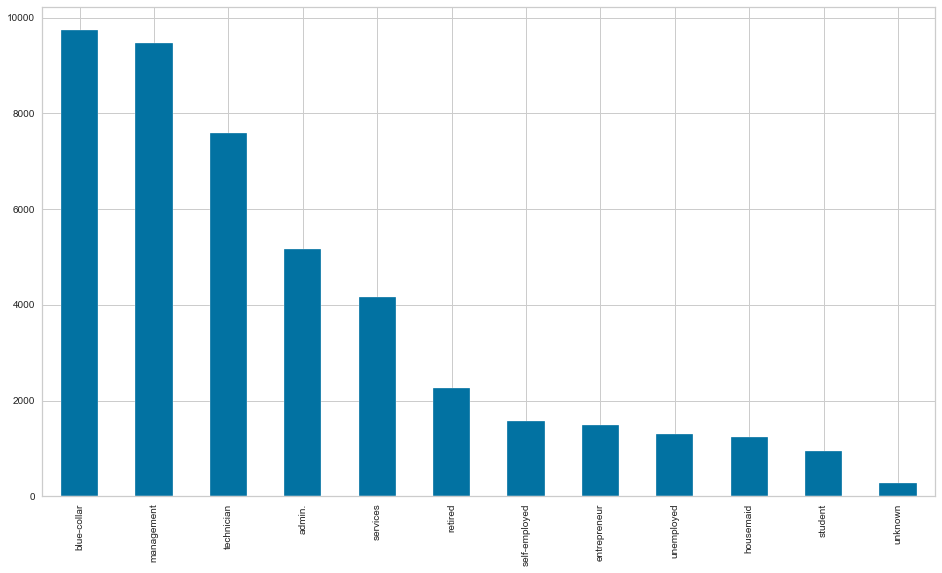

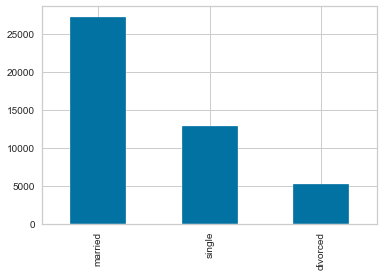

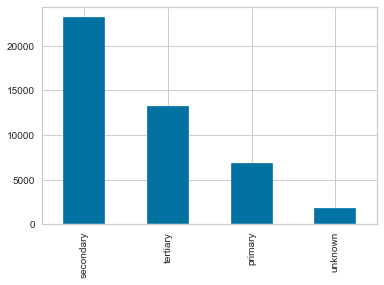

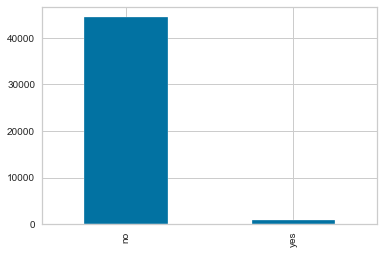

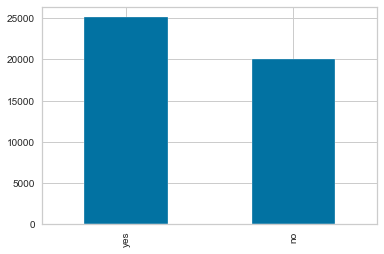

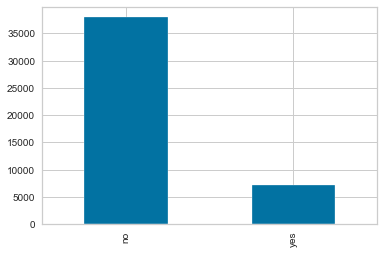

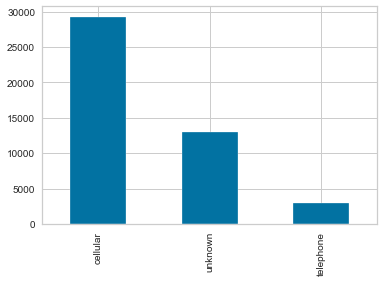

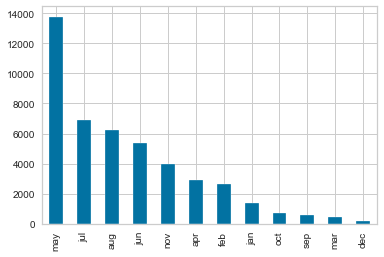

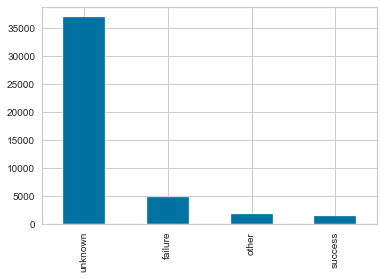

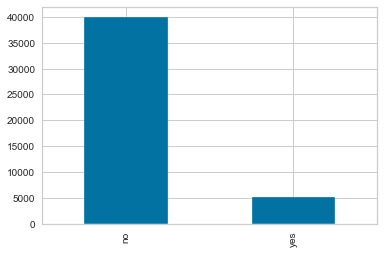

In [486]:
plt.figure(figsize=(16,9))
for feature in df_TermDeposit.columns: # Loop through all columns in the dataframe
        if str(df_TermDeposit.dtypes[feature]) == 'category':
            df_TermDeposit[feature].value_counts().plot(kind='bar')
           # print(feature)
           # sns.distplot(df_TermDeposit[feature].value_counts())
            plt.show()
       
       

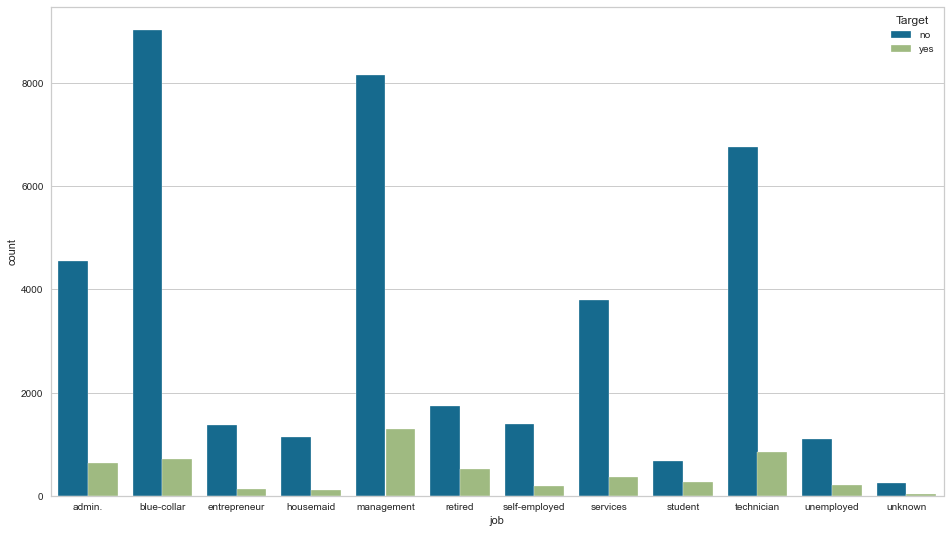

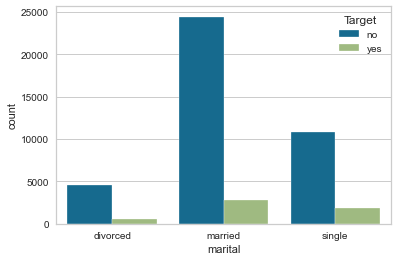

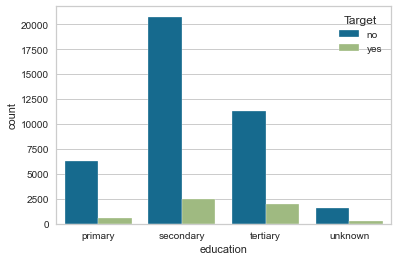

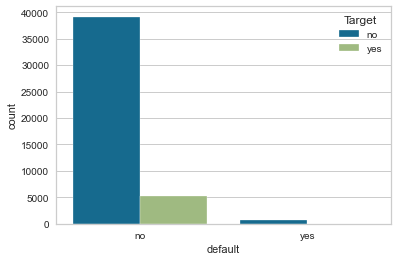

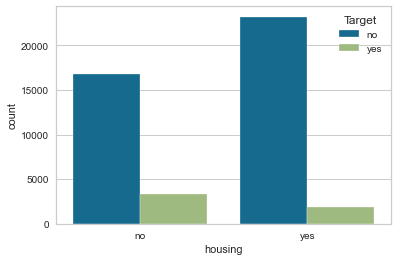

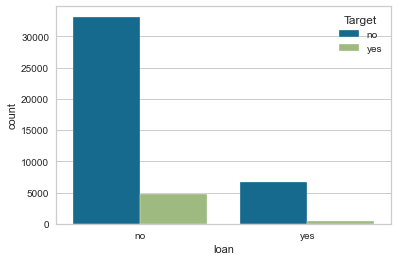

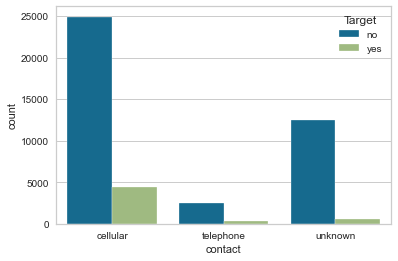

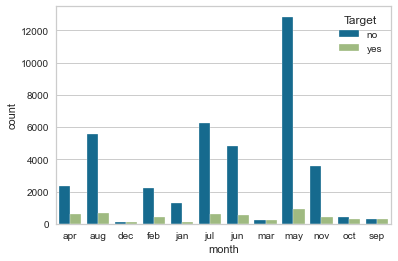

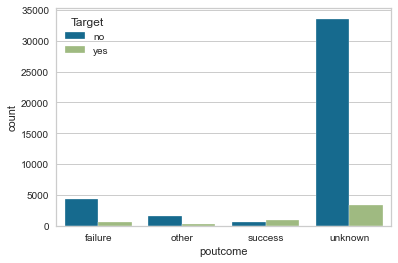

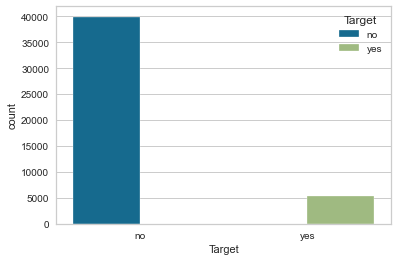

In [487]:
plt.figure(figsize=(16,9))
for feature in df_TermDeposit.columns: # Loop through all columns in the dataframe
        if str(df_TermDeposit.dtypes[feature]) == 'category':
            sns.countplot(df_TermDeposit[feature], hue=df_TermDeposit['Target'])
            plt.show()

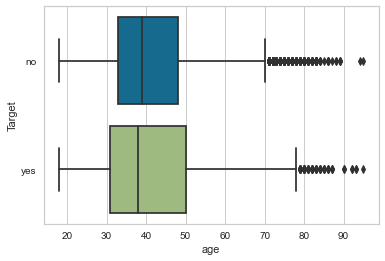

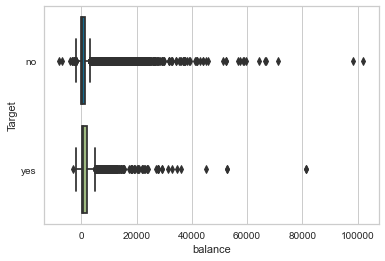

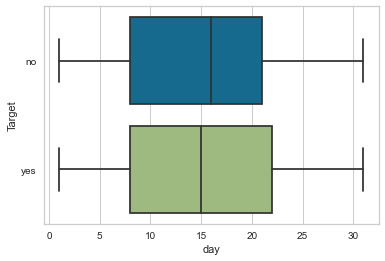

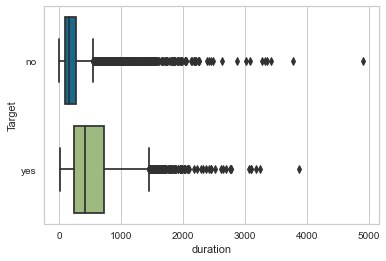

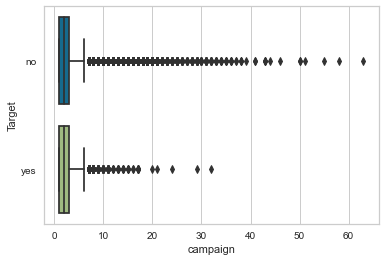

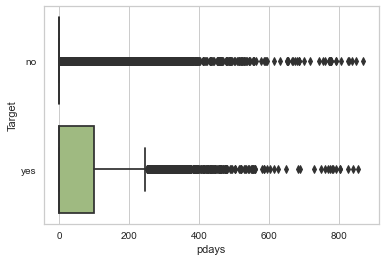

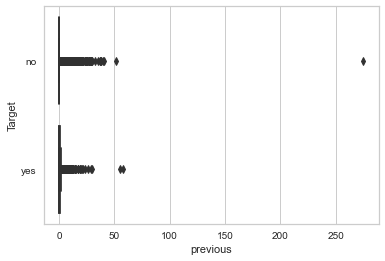

In [488]:
#Use boxplot to view outliers
for feature in df_TermDeposit.columns:
    if df_TermDeposit[feature].dtype == 'int64':
        sns.boxplot(df_TermDeposit[feature],df_TermDeposit['Target'] ) 
        plt.show()

In [489]:
#Note:Review data/volumes by creating histogram on numeric and countplot/displot for each object/category features/columns
#The blue-coller is the job/occupation has more data however management occupation customers relatively more subscribed term deposit.
#The customers with no personal loans and cellular contact relatively more subscribed term deposit.


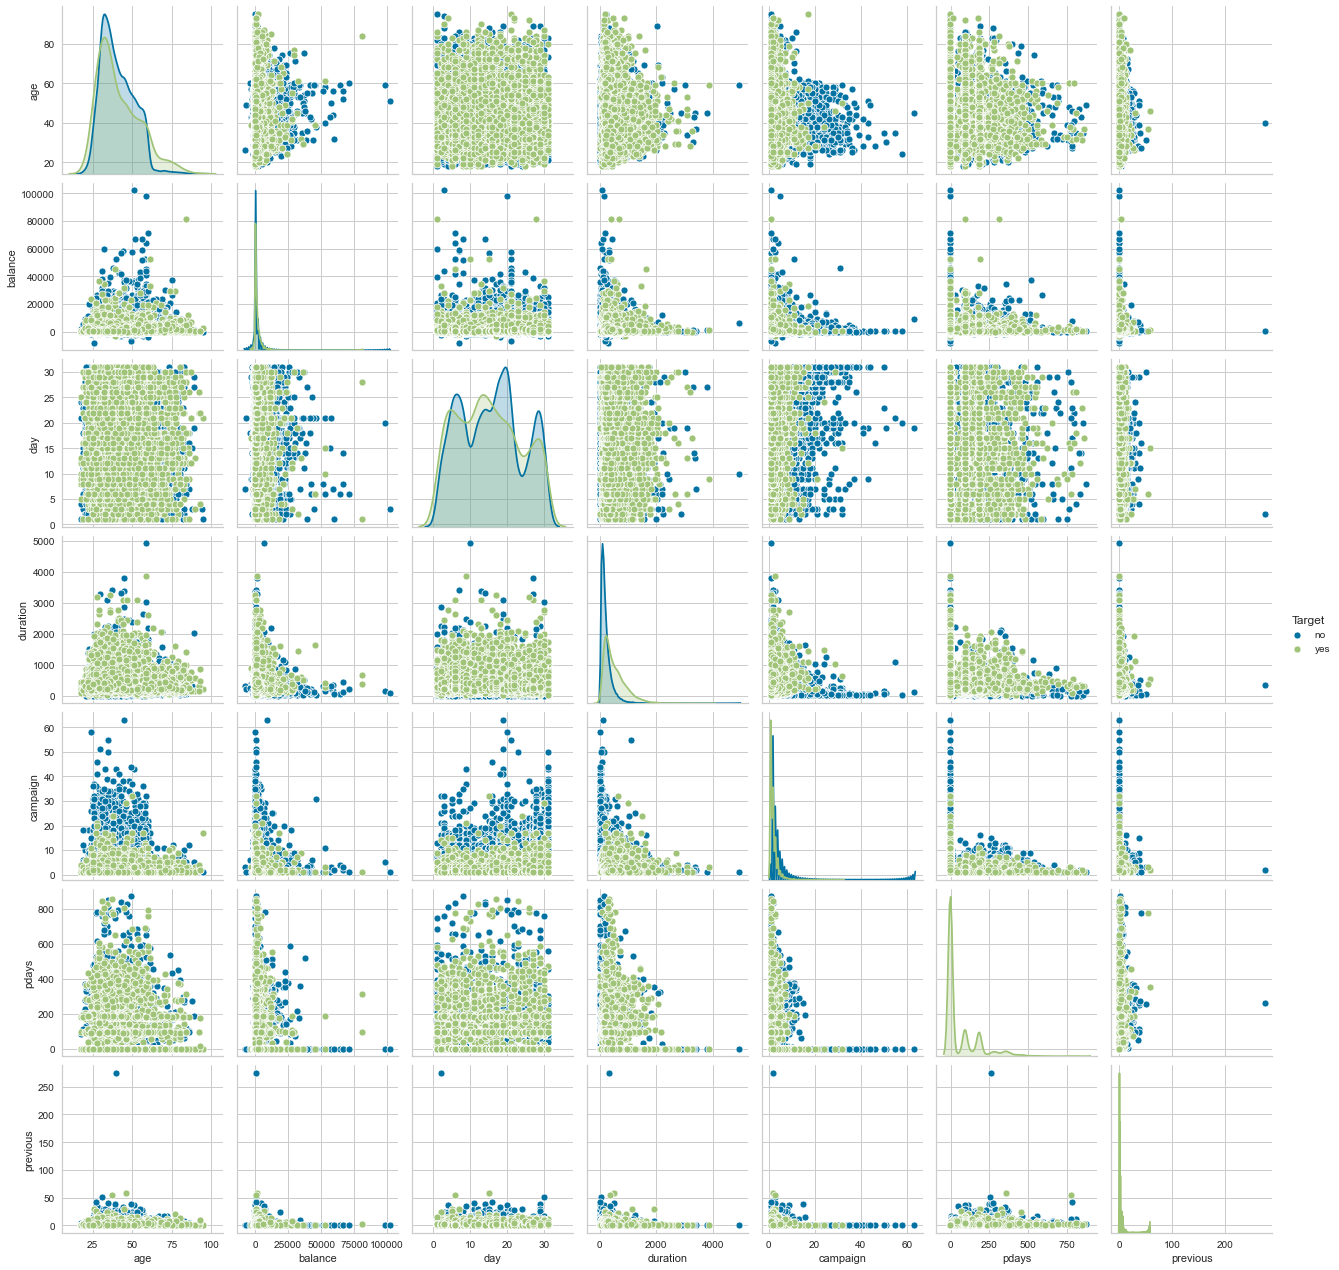

In [490]:
#Using pairplots and correlation method to observe the relationship between different variables.
sns.pairplot(df_TermDeposit, hue="Target")

<Figure size 864x576 with 0 Axes>

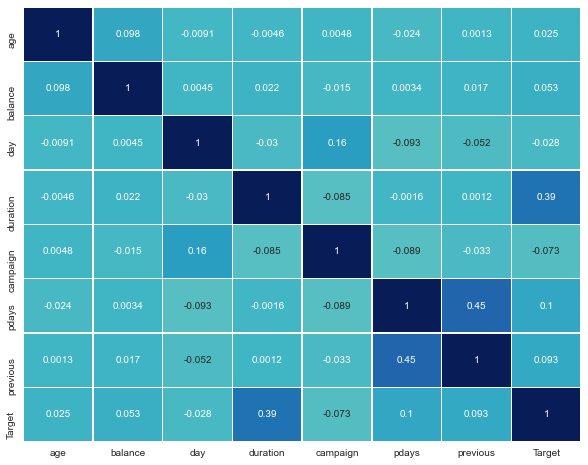

In [491]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df_TermDeposit['Target'] = LabelEncoder().fit_transform(df_TermDeposit['Target'])

plt.figure(figsize=(10,8))
sns.heatmap(df_TermDeposit.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

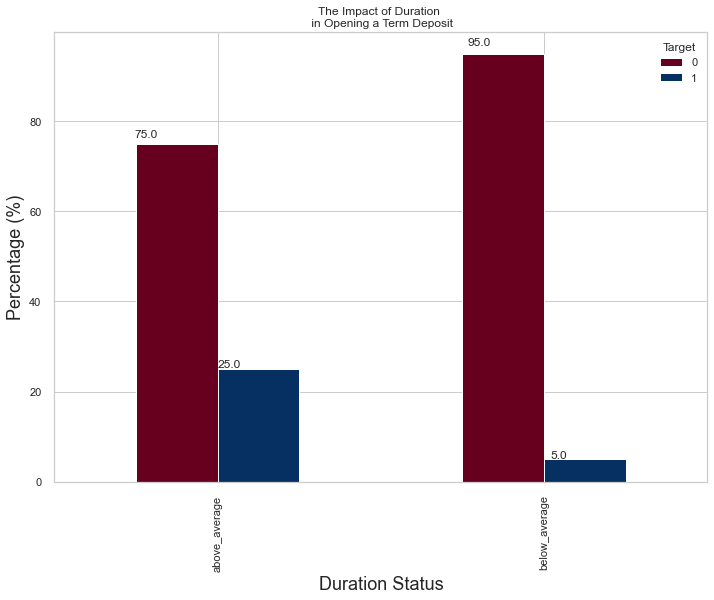

In [492]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #***
sns.set_style('whitegrid')
avg_duration = df_TermDeposit['duration'].mean()

lst = [df_TermDeposit]
df_TermDeposit["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df_TermDeposit['duration_status'], df_TermDeposit['Target']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit")
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

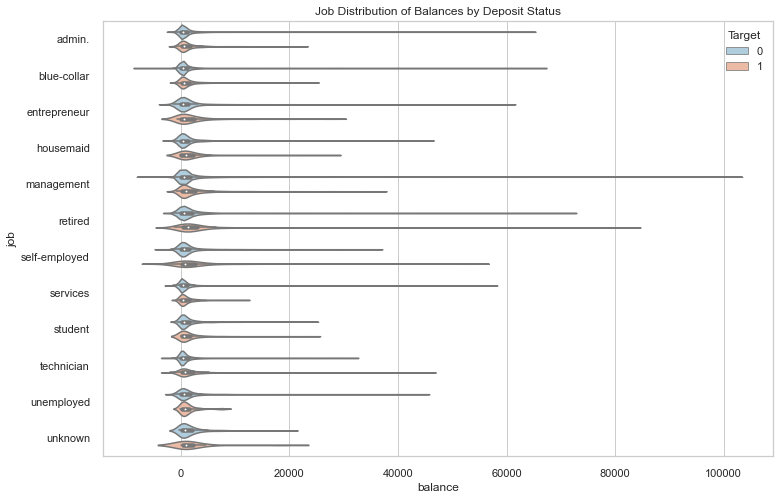

In [493]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="Target", palette="RdBu_r",
            data=df_TermDeposit);
plt.title("Job Distribution of Balances by Deposit Status")

plt.show()

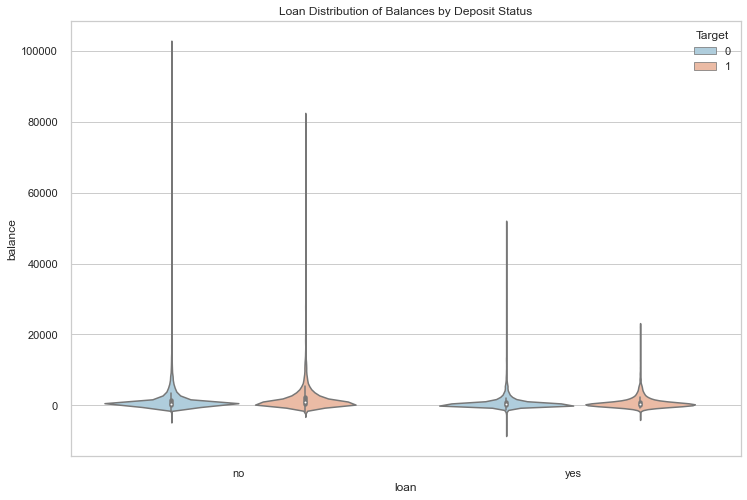

In [494]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="loan", y="balance", hue="Target", palette="RdBu_r",
            data=df_TermDeposit);
plt.title("Loan Distribution of Balances by Deposit Status")

plt.show()

In [495]:
df_TermDeposit.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'duration_status'],
      dtype='object')

In [496]:
pd.crosstab(df_TermDeposit['duration'],df_TermDeposit['Target'],normalize='index')

Target,0,1
duration,,
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3366,1.0,0.0
3422,1.0,0.0
3785,1.0,0.0


In [497]:
pd.crosstab(df_TermDeposit['marital'],df_TermDeposit['Target'],normalize='index')

Target,0,1
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


In [498]:
pd.crosstab(df_TermDeposit['education'],df_TermDeposit['Target'],normalize='index')

Target,0,1
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


In [499]:
TermDeposit_Y = df_TermDeposit['Target'].value_counts(normalize=True)*100
print(TermDeposit_Y) #just re-verfiy volume

0    88.30152
1    11.69848
Name: Target, dtype: float64


In [500]:
df_TermDeposit.groupby(['Target']).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [501]:
df_TermDeposit.groupby(['Target']).median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
0,39,417,16,164,2,-1,0
1,38,733,15,426,2,-1,0


In [502]:
# housing has a -20% correlation with Target let's see how it is distributed.
# 55 %
df_TermDeposit["housing"].value_counts()/len(df_TermDeposit)*100

yes    55.583818
no     44.416182
Name: housing, dtype: float64

In [503]:
df_TermDeposit["loan"].value_counts()/len(df_TermDeposit)*100

no     83.977351
yes    16.022649
Name: loan, dtype: float64

In [504]:
df_TermDeposit["default"].value_counts()/len(df_TermDeposit)*100

no     98.197341
yes     1.802659
Name: default, dtype: float64

In [505]:
#Notes: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.
#Job in managment role has more balance and retired were the most likely to suscribe to a term deposit.
#After noticiing that the column of loan contains 84% of "no" and housing has major 56% ,  is an important feature that determines whether a potential client will open a term deposit or not

In [506]:
#Deliverable – 2 and 3

In [507]:
X = df_TermDeposit.drop(['Target'], axis=1)
Y = df_TermDeposit['Target']

In [508]:
X = pd.get_dummies(X, drop_first=True) 

In [509]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            45211 non-null  int64
 1   balance                        45211 non-null  int64
 2   day                            45211 non-null  int64
 3   duration                       45211 non-null  int64
 4   campaign                       45211 non-null  int64
 5   pdays                          45211 non-null  int64
 6   previous                       45211 non-null  int64
 7   job_blue-collar                45211 non-null  uint8
 8   job_entrepreneur               45211 non-null  uint8
 9   job_housemaid                  45211 non-null  uint8
 10  job_management                 45211 non-null  uint8
 11  job_retired                    45211 non-null  uint8
 12  job_self-employed              45211 non-null  uint8
 13  job_services    

In [510]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,duration_status_below_average
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [511]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

Recall: 0.23859191655801826

Precision: 0.5970636215334421

F1 Score: 0.34094084769445737

Roc Auc Score: 0.6090299566164988


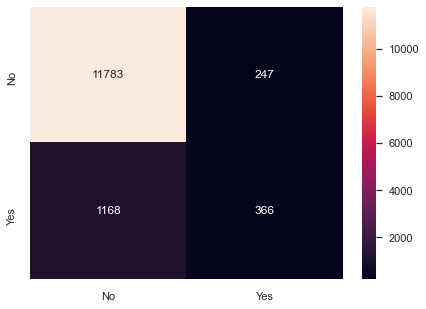

In [512]:
#splitting the data in 70:30 ratio of train to test data

#1st analysis based on LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)     

y_predict = logreg.predict(X_test)  

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


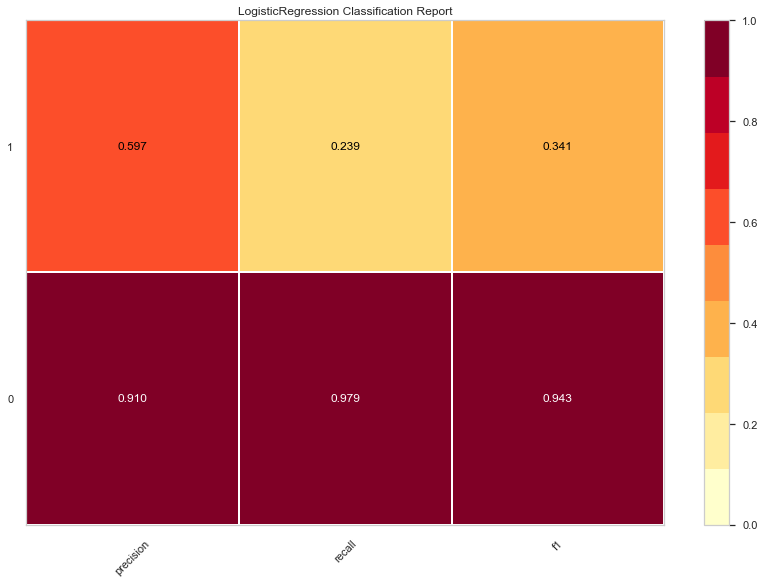

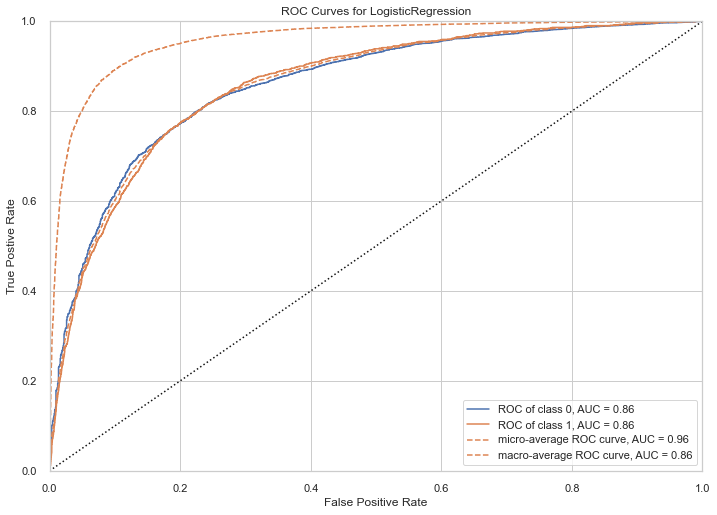

In [513]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [514]:
#2nd Analysis based on DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)


print(metrics.accuracy_score(y_test, y_predict))
print(dTree.score(X_train, y_train)) # performance on train data
print(dTree.score(X_test, y_test)) # performance on test data

0.8743733411972869
1.0
0.8743733411972869


In [515]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_predict
comp_df.head(5)

,Class_actual,Class_predicted
33177,0,0
1544,0,0
44480,0,1
17886,0,0
12505,0,0


In [516]:
y_test.value_counts(normalize=True)

0    0.886907
1    0.113093
Name: Target, dtype: float64

In [517]:
dTreeR.feature_importances_

array([0.0250848 , 0.00304688, 0.00276486, 0.53767943, 0.00133169,
       0.01157205, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05407951,
       0.        , 0.        , 0.0153666 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01813677,
       0.00621845, 0.00307741, 0.00983296, 0.        , 0.        ,
       0.31180859, 0.        , 0.        ])

In [518]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                    Imp
age                            0.025085
balance                        0.003047
day                            0.002765
duration                       0.537679
campaign                       0.001332
pdays                          0.011572
previous                       0.000000
job_blue-collar                0.000000
job_entrepreneur               0.000000
job_housemaid                  0.000000
job_management                 0.000000
job_retired                    0.000000
job_self-employed              0.000000
job_services                   0.000000
job_student                    0.000000
job_technician                 0.000000
job_unemployed                 0.000000
job_unknown                    0.000000
marital_married                0.000000
marital_single                 0.000000
education_secondary            0.000000
education_tertiary             0.000000
education_unknown              0.000000
default_yes                    0.000000


0.9023149513417871
Recall: 0.35267275097783574

Precision: 0.6197021764032073

F1 Score: 0.449522226838388

Roc Auc Score: 0.6625375392461914


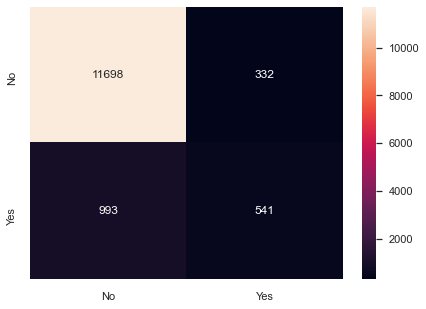

In [519]:
#DecisionTreeClassifier
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


In [520]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)

print(dTreeR.score(X_train, y_train))  # performance on train data
print(dTreeR.score(X_test, y_test))    # performance on test data

0.9027711947419976
0.9023149513417871


In [521]:
#Note: There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.
#Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy, we can improve performance

0.9023149513417871
Recall: 0.35267275097783574

Precision: 0.6197021764032073

F1 Score: 0.449522226838388

Roc Auc Score: 0.6625375392461914


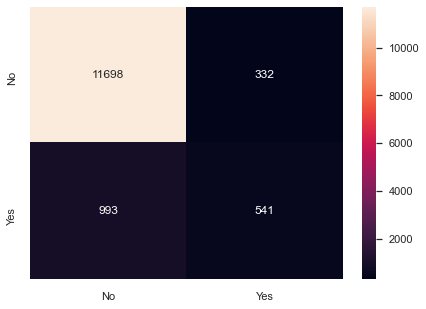

In [522]:
#DecisionTreeClassifier with max_depth = 5 (ALSO Tried with 3 however 5 gives better result)

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

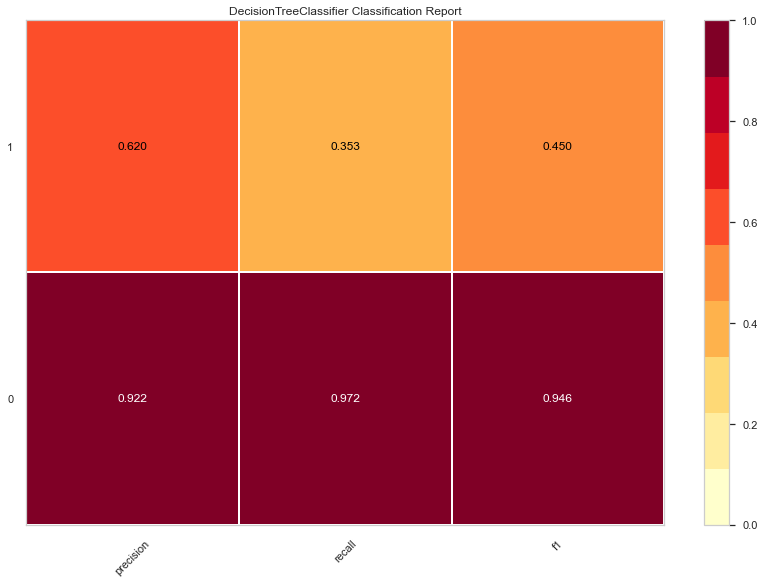

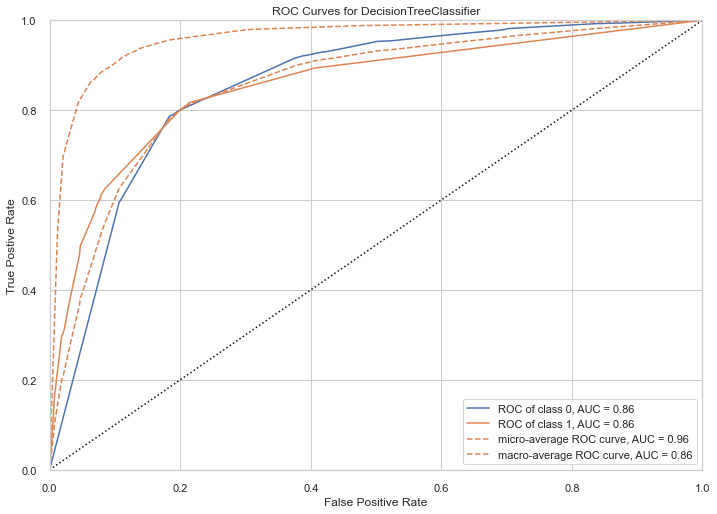

In [523]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(dTreeR)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(dTreeR)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

0.906664700678266
Recall: 0.4654498044328553

Precision: 0.6155172413793103

F1 Score: 0.5300668151447661

Roc Auc Score: 0.7141879113602347


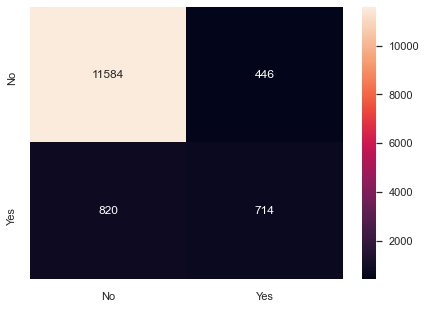

In [524]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

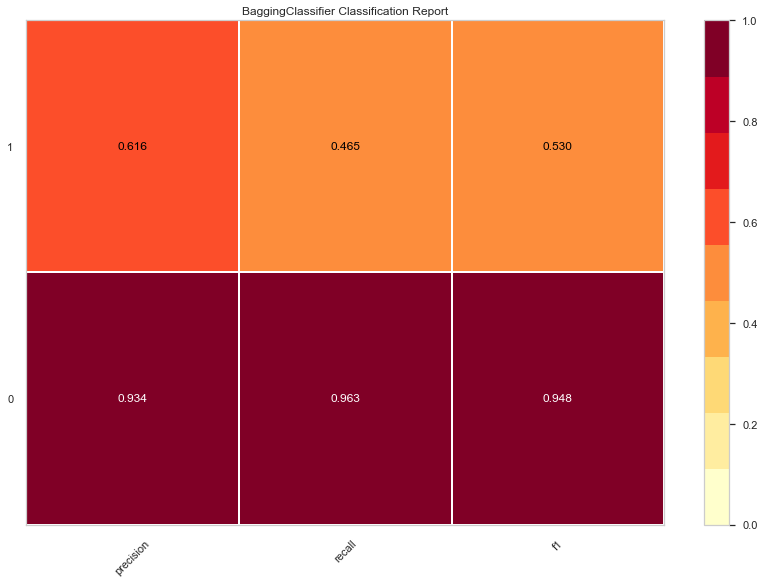

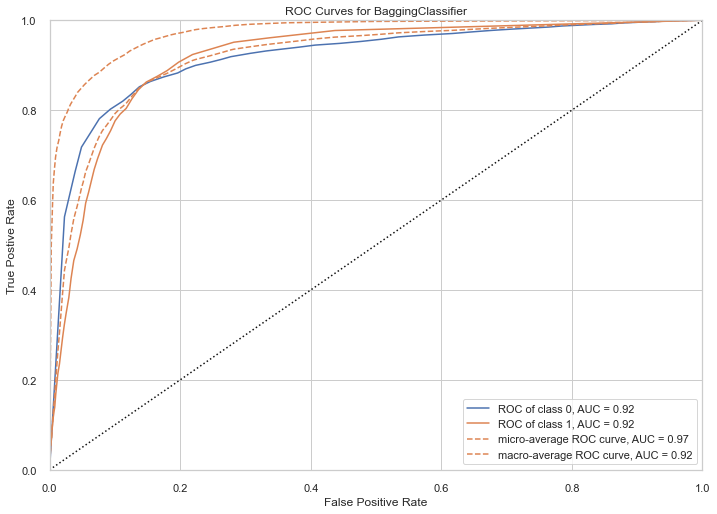

In [525]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(bgcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

0.9082866411088174
Recall: 0.3741851368970013

Precision: 0.668997668997669

F1 Score: 0.47993311036789293

Roc Auc Score: 0.6752887446746021


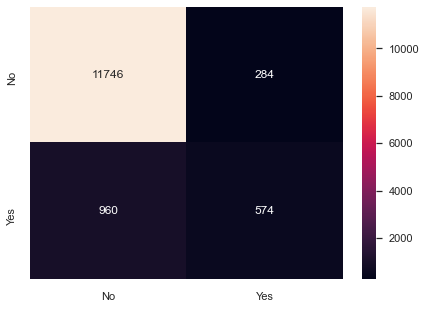

In [526]:
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier ## inherient Regression Alog, Y good to have a numeric
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

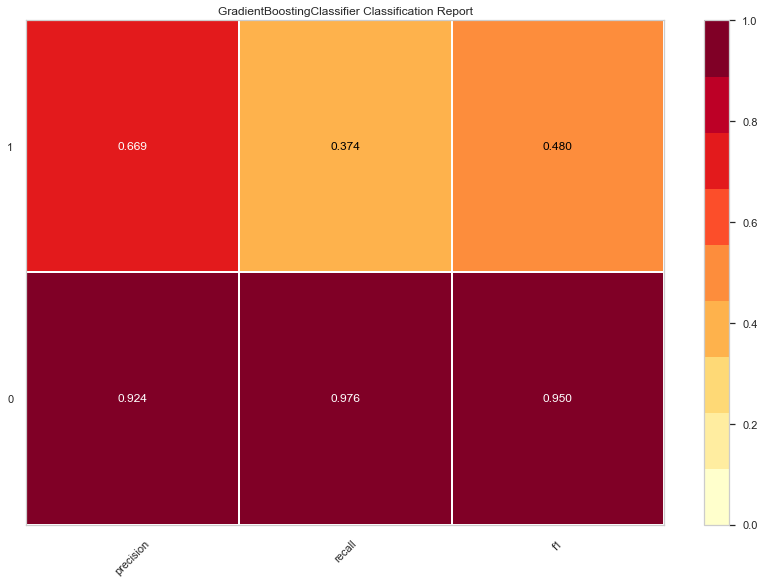

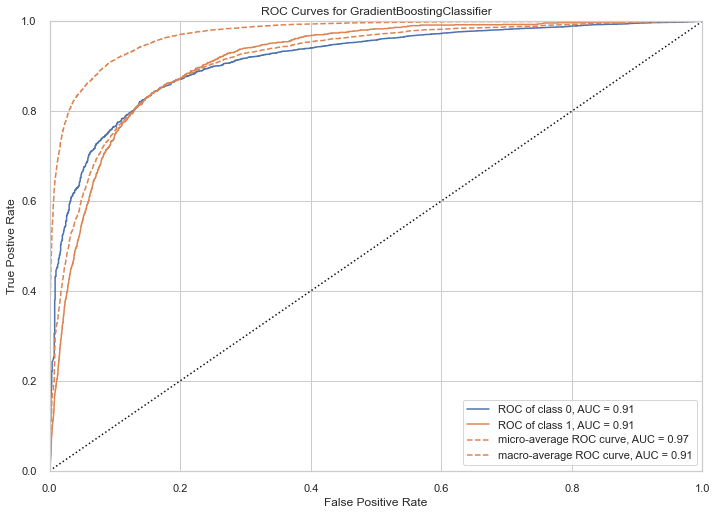

In [527]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(gbcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(gbcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

0.896638159834857
Recall: 0.4152542372881356

Precision: 0.5577933450087565

F1 Score: 0.4760837070254111

Roc Auc Score: 0.6866379249616074


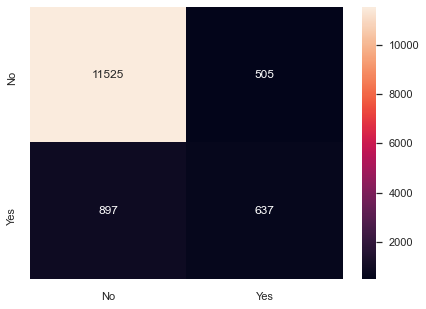

In [528]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

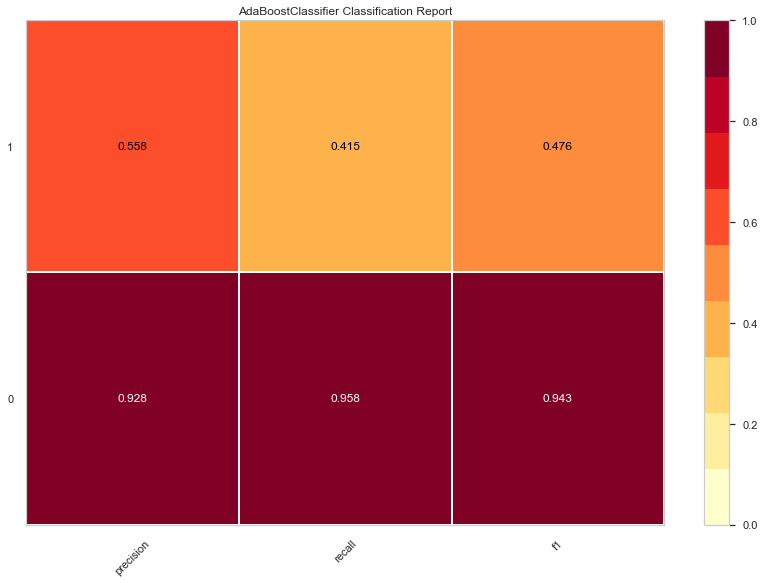

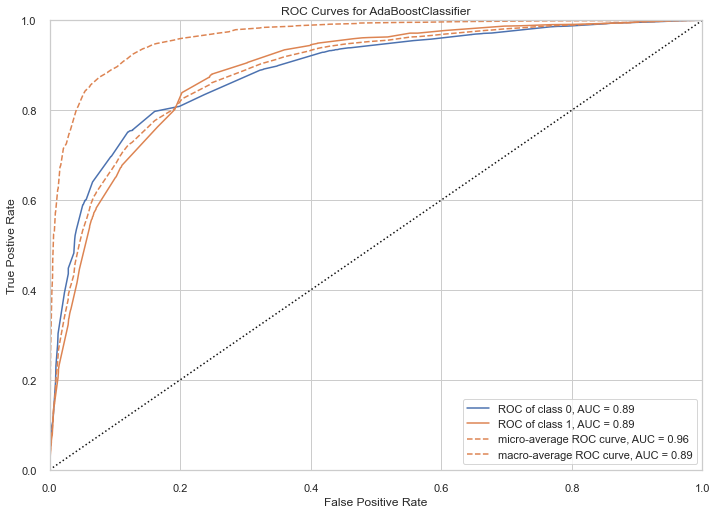

In [529]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(abcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(abcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

0.9047478619876143
Recall: 0.4178617992177314

Precision: 0.6163461538461539

F1 Score: 0.4980574980574981

Roc Auc Score: 0.6923473584617336


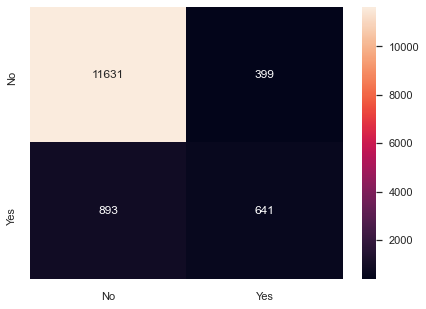

In [530]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
#(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
#tried and explore with mutiple n_estimators and other criteria
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

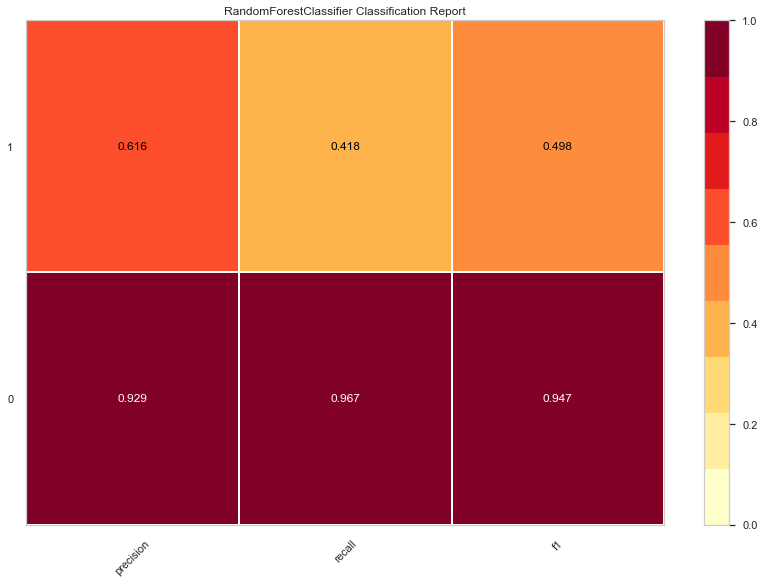

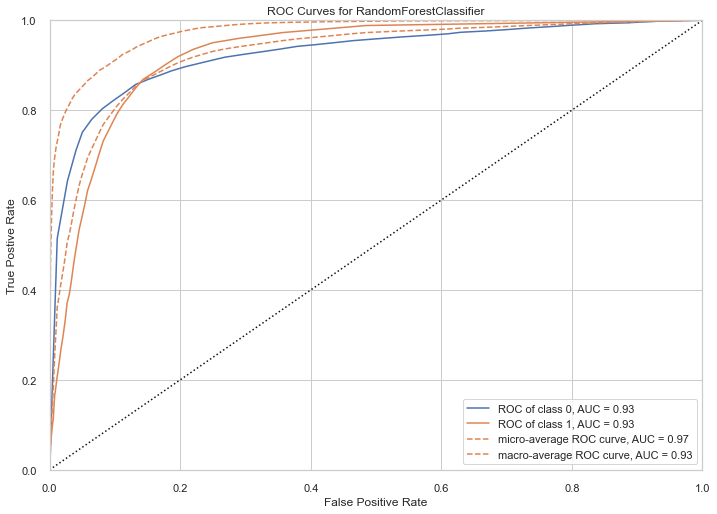

In [531]:

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(rfcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(rfcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [602]:
from sklearn.metrics import accuracy_score

for summary in (logreg, dTree, bgcl, gbcl,abcl,rfcl):
    summary.fit(X_train, y_train)
    predict = summary.predict(X_test)
    print("Accuracy :",summary.__class__.__name__, accuracy_score(y_test, predict))
    print("Recall :", summary.__class__.__name__,recall_score(y_test,y_predict))
    print("Precision :",summary.__class__.__name__,precision_score(y_test,y_predict)) 
    print()
    print()
    

Accuracy : LogisticRegression 0.8956797404895311
Recall : LogisticRegression 0.4198174706649283
Precision : LogisticRegression 0.6007462686567164


Accuracy : DecisionTreeClassifier 0.8743733411972869
Recall : DecisionTreeClassifier 0.4198174706649283
Precision : DecisionTreeClassifier 0.6007462686567164


Accuracy : BaggingClassifier 0.906664700678266
Recall : BaggingClassifier 0.4198174706649283
Precision : BaggingClassifier 0.6007462686567164


Accuracy : GradientBoostingClassifier 0.9082866411088174
Recall : GradientBoostingClassifier 0.4198174706649283
Precision : GradientBoostingClassifier 0.6007462686567164


Accuracy : AdaBoostClassifier 0.896638159834857
Recall : AdaBoostClassifier 0.4198174706649283
Precision : AdaBoostClassifier 0.6007462686567164


Accuracy : RandomForestClassifier 0.7429961663226187
Recall : RandomForestClassifier 0.4198174706649283
Precision : RandomForestClassifier 0.6007462686567164




In [603]:
results_df=pd.DataFrame()
from sklearn.metrics import accuracy_score
for summary in (logreg, dTree, bgcl, gbcl,abcl,rfcl):
    summary.fit(X_train, y_train)
    predict = summary.predict(X_test)
    df_res=pd.DataFrame(data={'Classifier':summary.__class__.__name__, 'Accuracy score':accuracy_score(y_test, predict),    
                             'Recall':recall_score(y_test,y_predict),'Precision':precision_score(y_test,y_predict)}, index=[0])
    results_df=results_df.append(df_res,ignore_index=True)    
results_df

,Classifier,Accuracy score,Recall,Precision
0,LogisticRegression,0.895680,0.419817,0.600746
1,DecisionTreeClassifier,0.874373,0.419817,0.600746
2,BaggingClassifier,0.906665,0.419817,0.600746
3,GradientBoostingClassifier,0.908287,0.419817,0.600746
4,AdaBoostClassifier,0.896638,0.419817,0.600746
5,RandomForestClassifier,0.741153,0.419817,0.600746


In [ ]:
#For the available data and going through EDA (visualization of data),we need to treat imbalance in the data to improve Precision and Recall.
#Gradient Boosting classifier is the best model to predict whether or not a potential client will subscribe to a term deposit or not.